In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from pprint import pprint
import pickle

In [2]:
source_df = pd.read_pickle('./resources/temp_file/2022_inves.pkl').iloc[:, 11:]
source_df: pd.DataFrame
source_df

,1、请选择肝包虫类型：（）？,2、请选择肝包虫类型：（）？,3、请选择肝包虫类型：（）？,4、请选择肝包虫类型：（）？,5、请选择肝包虫类型：（）？,6、请选择肝包虫类型：（）？,7、请选择肝包虫类型：（）？,8、请选择肝包虫类型：（）？,9、请选择肝包虫类型：（）？,10、请选择肝包虫类型：（）？,...,441、请选择肝包虫类型：（）？,442、请选择肝包虫类型：（）？,443、请选择肝包虫类型：（）？,444、请选择肝包虫类型：（）？,445、请选择肝包虫类型：（）？,446、请选择肝包虫类型：（）？,447、请选择肝包虫类型：（）？,448、请选择肝包虫类型：（）？,449、请选择肝包虫类型：（）？,450、请选择肝包虫类型：（）？
0,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,1,-3,-3
1,-3,-3,-3,-3,-3,-3,1,-3,-3,-3,...,-3,-3,-3,1,-3,-3,-3,-3,-3,-3
2,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,1,-3,-3,-3,-3,-3,-3,-3
3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4,-3,-3,-3,-3,-3,-3,-3,1,-3,-3,...,-3,-3,1,-3,-3,-3,-3,-3,-3,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-3,-3,-3,-3,-3,-3,1,-3,-3,-3,...,1,-3,-3,-3,-3,-3,-3,-3,-3,-3
127,-3,-3,-3,-3,1,-3,-3,-3,-3,-3,...,-3,-3,2,-3,-3,-3,-3,-3,-3,-3
128,-3,-3,-3,-3,-3,1,-3,-3,-3,-3,...,-3,1,-3,-3,-3,-3,-3,-3,-3,-3
129,1,-3,-3,-3,-3,-3,-3,-3,-3,-3,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3


In [3]:
# 制作选项答案
# 答案为A，索引为0；答案为B，索引为1
answer_list = []
answer_index = '001100100001110111100100111010'
for index in answer_index:
    if index == '0':
        answer_list += [0] * 15
    elif index == '1':
        answer_list += [1] * 15

In [4]:
# 查看每道题有多少人做
num_list = []
for i in range(450):
    num_for_each_question = np.sum(source_df.iloc[:, i] != -3)
    num_list.append(num_for_each_question)
num_list = np.array(num_list)
print(np.max(num_list), np.min(num_list), np.mean(num_list))
# 查看是否有题没有人做
print(np.sum(num_list == 0))

18 1 8.733333333333333
0


In [5]:
# 计算每道题的诊断准确率
diagnosis_list = []
for i in range(450):
    results_list = source_df.iloc[:, i][source_df.iloc[:, i] != -3]
    num_for_each_question = np.sum(source_df.iloc[:, i] != -3)
    answer = answer_list[i] + 1
    accuracy = np.sum(results_list == answer) /  num_for_each_question
    diagnosis_list.append(accuracy)
print(len(diagnosis_list))

450


70
192


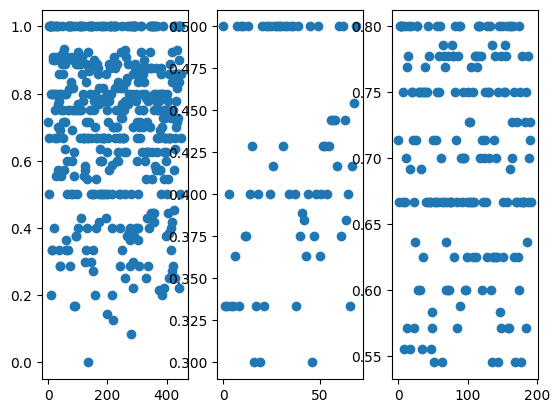

In [6]:
diagnosis_list = np.array(diagnosis_list)
# 可视化准确率
fig, ax = plt.subplots(nrows=1, ncols=3)
# 整体准确率
ax[0].scatter(range(450), diagnosis_list)

# 准确率0-50
accuracy_50 = diagnosis_list[(diagnosis_list <= 0.5) & (diagnosis_list >= 0.3)]
print(len(accuracy_50))
ax[1].scatter(range(len(accuracy_50)), accuracy_50)

# 准确率50-80
accuracy_80 = diagnosis_list[(diagnosis_list > 0.5) & (diagnosis_list <= 0.8)]
print(len(accuracy_80))
ax[2].scatter(range(len(accuracy_80)), accuracy_80)

In [7]:
# 获取准确率<=80%的题的索引
index_50 = np.where(diagnosis_list <= 0.5)[0]
index_80 = np.where((diagnosis_list > 0.5) & (diagnosis_list <= 0.8))[0]
print(len(index_50), len(index_80))

98 192


In [8]:
def get_best_results():
    selected_index1 = np.random.choice(index_80, 192, replace=False)
    selected_index2 = np.random.choice(index_50, 98, replace=False)
    selected_index = np.concatenate((selected_index1, selected_index2))
    accuracy_list = diagnosis_list[selected_index]
    accuracy_selected = np.average(accuracy_list)
    
    # 计算每道题的概率，即患者有多少可能预测该图是AE
    # 设概率为预测 AE 的概率
    predict_AE_prob_list = []
    answer_list_new = []
    for index in selected_index:
        answer_list_new.append(answer_list[index])
        predict_AE_num = np.sum(source_df.iloc[:, index] == 2)
        predict_AE_prob = predict_AE_num / num_list[index]
        predict_AE_prob_list.append(predict_AE_prob)
    ac = roc_auc_score(answer_list_new, predict_AE_prob_list)
    return accuracy_selected, ac, selected_index

In [11]:
get_best_results()

(0.5867099133681284,
 0.7485887868350556,
 array([372, 187, 226, 396, 108,  14, 404, 430, 268, 340,   0, 271, 160,
        229, 365, 162, 129, 428, 370,  58, 120, 307, 385, 167, 308, 437,
         30, 124, 243, 335,  21,  80, 394, 228, 330, 259, 374, 190, 158,
        206, 360, 390, 449, 240, 391,  34, 198,  81, 179,  38, 388, 352,
         48, 299, 166, 252, 373, 270, 100, 296,  27, 186, 172, 421, 345,
         42, 216, 192,  90, 363, 297, 251, 202,  59, 121, 322, 130, 253,
        250, 116, 371, 255,  43,  56,  97,  44,  19, 235,  71, 359, 256,
        409, 336, 237,  31, 191, 412, 318, 334, 375, 122, 233, 247, 109,
        366, 231, 310, 239, 377,  32, 204, 309, 153, 398,  87,  36, 381,
         55, 142, 146, 329, 319, 197, 189, 203, 209, 136,  54, 181, 367,
        393, 262, 403, 331,  22,   9,  49, 257, 413, 200, 157, 117,  82,
        431, 177, 400, 317,  23, 219, 433, 378, 326, 350,   2,  39, 174,
        414, 358, 384, 131, 327, 395, 402, 288, 134, 369, 141, 300, 379,
        3

In [10]:
while True:
    accuracy_selected, ac, selected_index = get_best_results()
    if round(ac, 2) == 0.89:
        break
print(accuracy_selected, ac)


KeyboardInterrupt



In [118]:
accuracy_list = diagnosis_list[selected_index]
accuracy_selected = np.average(accuracy_list)

# 计算每道题的概率，即患者有多少可能预测该图是AE
# 设概率为预测 AE 的概率
predict_AE_prob_list = []
answer_list_new = []
for index in selected_index:
    answer_list_new.append(answer_list[index])
    predict_AE_num = np.sum(source_df.iloc[:, index] == 2)
    predict_AE_prob = predict_AE_num / num_list[index]
    predict_AE_prob_list.append(predict_AE_prob)
ac = roc_auc_score(answer_list_new, predict_AE_prob_list)
print(accuracy_selected, ac)

0.6033123358123357 0.7869855394883203


In [121]:
with open('./resources/temp_file/selected_index_2022.pkl', 'wb') as f:
    pickle.dump(selected_index, f)